<a href="https://colab.research.google.com/github/lbenitoc/test/blob/master/unsupervised_models/Principal_components/Lab_MNIST_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align=center><font size = 5>PCA MNIST DATA</font></h1>

---


## Tabla de Contenidos

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
    
1. <a href="#item31">Introducción</a>  
2. <a href="#item32">MNIST Digit Recognition</a>  
3. <a href="#item33">Análisis de componentes Principales</a>  
4. <a href="#item34">PCA para visualización</a>  
5. <a href="#item34">PCA para reducción de dimensiones</a>  
7. <a href="#item34">¿Cómo elegir el número de componentes?</a>  

---
</font>
</div>

## Introducción


En este laboratorio, aprenderá a usar python para construir modelos de PCA.


<h3>Objetivo de este Notebook<h3>    
<h5> 1. Como construir e interpretar un modelo de PCA.</h5>
<h5> 2. Descargar y limpiar un Dataset </h5>
<h5> 3. Realizar los pasos necesarios previos a la etapa de modelamiento </h5>
<h5> 4. Entrenar y Evaluar un modelo </h5>    

---

Edward Rivera
Pablo quispe
Jose Cortez
Jaime Ramos

Primero, importemos algunos módulos que necesitaremos para el análisis y construcción del modelo.

In [3]:
# Imports comunes

import numpy as np
import pandas as pd

# For plotting
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})


## MNIST Digit Recognition

En este laboratorio, Usaremos el popular conjunto de datos MNIST, un conjunto de datos de imágenes, para variar.

La <strong> base de datos MNIST </strong>, abreviatura de la base de datos modificada del Instituto Nacional de Estándares y Tecnología, es una gran base de datos de dígitos escritos a mano que se usa comúnmente para entrenar varios sistemas de procesamiento de imágenes. La base de datos también se usa ampliamente para entrenar y testear en el campo del machine learning.

La base de datos del MNIST contiene 60,000 imágenes de entrenamiento y 10,000 imágenes de test de dígitos escritos por estudiantes de secundaria y empleados de la Oficina del Censo de los Estados Unidos.



<img src="https://miro.medium.com/max/1400/1*26W2Yk3cu2uz_R8BuSb_SA.png" alt="HTML5 Icon" style="width: 600px; height: 450px;">

<strong>Puede consultar este [link](https://www.kaggle.com/c/digit-recognizer) para leer más sobre la fuente de datos.</strong>


**¿Qué es la reducción de dimensionalidad?**

Muchos de los problemas de Machine Learning consisten en cientos o miles de funciones. Tener una cantidad tan grande de características plantea ciertos problemas principalmente:


**Importancia de la reducción de la dimensionalidad:**

Reducir a dos o tres funciones puede ayudarnos a visualizar nuestros datos, que es una parte importante del análisis de datos. A menudo, una gran cantidad de dimensionalidad en los datos es redundante y podemos deshacernos de eso que puede ser útil para el proceso de aprendizaje automático.

**Reducir la dimensionalidad también puede ayudarnos a visualizar los datos fácilmente.**

Por ejemplo, el famoso conjunto de datos MNIST tiene 784 dimensiones cuando desplegamos esos dígitos en vectores largos y realmente no deberíamos necesitar 784 dimensiones para describir un punto de datos en este conjunto de datos. Debería haber una representación compacta de este conjunto de datos y aún deberíamos poder obtener algún resultado significativo.

## Análisis de componentes principales



PCA es una técnica muy común para la reducción de dimensionalidad. La idea detrás de esto es muy simple:
* Identificar un hiperplano que se encuentre más cerca de los datos
* Proyecte los datos en el hiperplano.

![](https://i.stack.imgur.com/Q7HIP.gif)


Sin embargo, es importante elegir el hiperplano correcto para que cuando los datos se proyecten sobre él, tengan la máxima cantidad de variación o información sobre cómo se distribuyen los datos originales. En otras palabras, el eje que minimiza la distancia cuadrática media entre el conjunto de datos original y su proyección sobre ese eje.





**Componentes principales**

El eje que explica la cantidad máxima de varianza en el conjunto de entrenamiento se denomina componentes principales. El eje ortogonal a este eje se denomina segundo componente principal. Así, en 2D, habrá 2 componentes principales. Sin embargo, para dimensiones más altas, PCA encontraría un tercer componente ortogonal a los otros dos componentes y así sucesivamente. 


![](https://hackernoon.com/hn-images/1*WRKdN-NYF0mMumhfOXVa2Q.png)

Fuente : [A Layman’s Introduction to Principal Components](https://hackernoon.com/a-laymans-introduction-to-principal-components-2fca55c19fa0)


**Implementación de PCA usando Scikit Learn**

La clase PCA de [Scikit-Learn's](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) implementa PCA usando la descomposición SVD. Apliquemos PCA en el conjunto de datos MNIST para la visualización.


## Descargar y limpiar Dataset


In [4]:
# Leyendo data 

train = pd.read_csv('train.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train.describe() 

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [6]:
## Configurar la etiqueta y las columnas de características

y = train.loc[:,'label'].values
x = train.loc[:,'pixel0':].values

In [7]:
## Estandarizar data

#Librería para estandarización
from sklearn.preprocessing import StandardScaler

standardized_data = StandardScaler().fit_transform(x)
print(standardized_data.shape)

(42000, 784)


In [8]:
standardized_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
train.drop(columns='label').cov()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
pixel0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0
pixel1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0
pixel2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0
pixel3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0
pixel4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pixel779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000627,-0.000335,-0.000169,0.172518,0.71092,0.171615,0.0,0.0,0.0,0.0
pixel780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0
pixel781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0
pixel782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0


## PCA para visualización


Una forma eficaz de visualizar datos de alta dimensión es representar cada objeto de datos mediante un punto bidimensional de tal forma que los objetos similares se representen mediante puntos cercanos y los distintos objetos mediante puntos distantes. Los puntos bidimensionales resultantes se pueden visualizar en un diagrama de dispersión. Esto lleva a un mapa de los datos que revela la estructura subyacente de los objetos, como la presencia de clusters. Veamos cómo podemos usar PCA para hacer eso.

In [10]:
## Importando y aplicando PCA

#PCA
from sklearn.decomposition import PCA

pca = PCA(n_components = 2) # project from 784 to 2 dimensions
principalComponents = pca.fit_transform(standardized_data)

principal_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principal_df.shape

(42000, 2)

In [11]:
principal_df.head()

,principal component 1,principal component 2
0,-5.140481,-5.225077
1,19.292274,6.034348
2,-7.644510,-1.706571
3,-0.474218,5.837052
4,26.559547,6.025743


In [12]:
# Ratio de varianza explicada

print('Varianza explicada por componente principal: {}'.format(pca.explained_variance_ratio_))

Varianza explicada por componente principal: [0.05747953 0.04111691]


Text(0, 0.5, 'Principal Component 2')

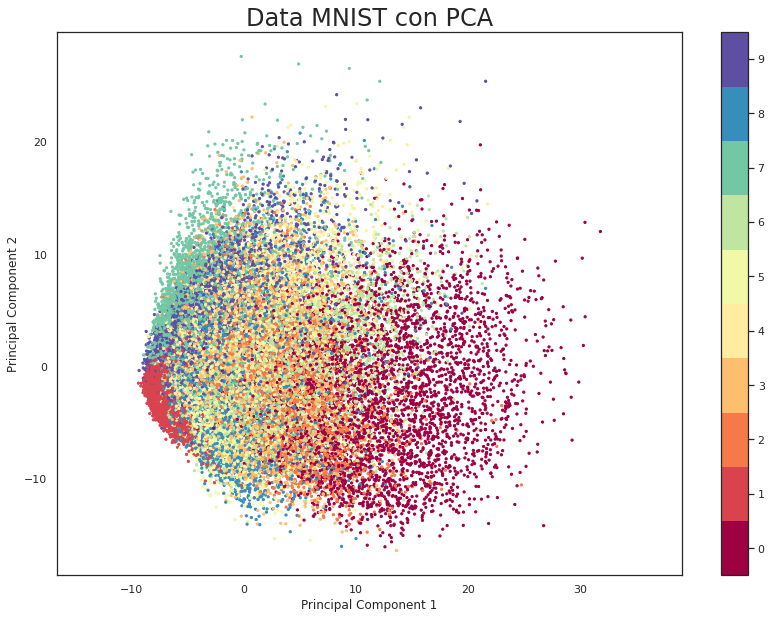

In [13]:
# Graficando los dos primeros componentes principales de cada punto para conocer los datos:

plt.scatter(principalComponents[:, 0], principalComponents[:, 1], s= 5, c=y, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Data MNIST con PCA', fontsize=24);
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')



Los datos completos son una nube de puntos de 784 dimensiones, y estos puntos coloreados son la proyección de cada punto de datos a lo largo de las direcciones con la mayor variación.

Esta representación nos permite ver la disposición de los dígitos en dos dimensiones. Otra cosa importante a tener en cuenta aquí es que lo hemos logrado sin supervisión, es decir, sin hacer referencia a las etiquetas. 

## PCA para reducción de dimensiones

In [14]:
## Usando 3 componentes principales

pca = PCA(n_components=3) # projectando 3 de 784 dimensiones
principalComponents = pca.fit_transform(standardized_data)
principal_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principal_df.shape

(42000, 3)

In [15]:
print('Varianza explicada por componente principal: {}'.format(pca.explained_variance_ratio_))

Varianza explicada por componente principal: [0.05747953 0.04111691 0.03782867]


El gráfico anterior muestra que, aunque los componentes pudieron contener cierta información, sin embargo, no es capaz de separar claramente los diferentes dígitos. Afortunadamente, existen otras técnicas de reducción de dimensionalidad que pueden ayudarnos a mejorar esto.

## Elegir el número correcto de componentes



La regla del pulgar es elegir el número de dimensiones que suman una porción suficientemente grande de la varianza (por ejemplo, 95%). Sin embargo, si su objetivo es visualizar el conjunto de datos, asegúrese de no elegir más de 2 o 3 dimensiones, ya que el objetivo entonces sería reducir las dimensiones.

In [16]:

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(x)


In [18]:
X_reduced.shape

(42000, 154)

También puede graficar la varianza explicada en función del número de dimensiones. Habrá un codo en la curva, donde la varianza explicada deja de crecer rápidamente.

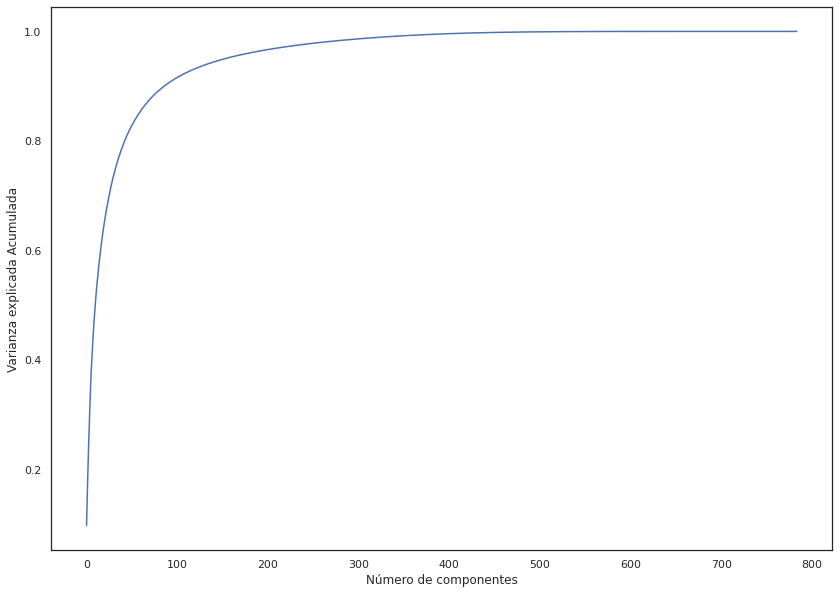

In [19]:
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada Acumulada');

---

# Gracias por completar este laboratorio!

---

